In [65]:
# Câu 1
# =====

import os
import re
import nltk
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS

def std_text(text):
    # Mở tệp txt
    with open("teencode.txt", "r", encoding="utf-8") as f:
        # Đọc các dòng trong tệp
        lines = f.readlines()

    # Tạo dict
    lookup_dict = {}
    for line in lines:
        # Cắt dòng thành hai phần, khóa và giá trị
        key, value = line.split("\t")

        # Thêm cặp khóa-giá trị vào dict
        lookup_dict[key.strip()] = value.strip()
    
    words = text.split()
    # Get Abbreviations Words
    text_pre=""
    for word in words:
        w=word
        w = re.sub(r'[^\w\s]','',w) #Removing Punctuation
        if w.lower() in lookup_dict:
            word=lookup_dict[w]
        text_pre=text_pre + " " + word        
    return text_pre
        
def converting_emojis(text):
    for x in EMOTICONS_EMO:
        text = text.replace(x, "_".join(EMOTICONS_EMO[x].replace(",","").replace(":","").split()))
    for x in UNICODE_EMOJI:
        text = text.replace(x, "_".join(UNICODE_EMOJI[x].replace(",","").replace(":","").split()))
    return text
def remove_stopword(text):
    with open("vietnamese-stopwords.txt", "r", encoding="utf-8") as f:
        vn = f.read()

    #Get Stop words Dictionaries
    List_StopWords=vn.split("\n")

    #remove stop words
    text_pre=" ".join(text for text in text.split() if text not in List_StopWords)
    return text_pre

# Lấy danh sách các file trong thư mục
files = os.listdir("Data4")
# Duyệt qua các file
for file in files:
    # Đọc file
    # Nối đường dẫn
    path = os.path.join("Data4", file)
    with open(path, "r", encoding="utf-8") as f:
        data = f.read()
    # Xử lý dữ liệu
    text = data.lower() # viết thường
    text =converting_emojis(text) #chuyển icon thành văn bản
    text = text.replace(" .","\n") # tách câu
    text = re.sub(r'[^\w\s]','',text) #xóa dấu câu
    text = re.sub("\d+", " ", text) #xóa số
    text = text.split("\n")
    file_path = os.path.join("Data4_solved", file)
    for i in range(len(text)): 
        text[i] = remove_stopword(text[i]) #loại bỏ stop word
        text[i] = std_text(text[i]) #chuẩn hóa văn bản
        print(text[i])
        with open("data.txt", "a", encoding="utf-8") as f:
            # Ghi tất cả dữ liệu vào 1 file
            f.writelines(text[i] + "\n")
        
        with open(file_path, "a", encoding="utf-8") as x:
            x.write(text[i])

 hôm đi sinh_nhật
 gọi
 gọi đồ quán vắng_hoe
 phút đồ
 điện_thoại call vô_số quán giục quán chúng_em đi giao đồ what the fuck
 phút chân chạy giục đồ bắt_đầu pha_chế what the fuck làm_gì phút
 đầu quán vô
 cùng_đồ h không câu xin_lỗi
 đồ uống nhạt đặc_biệt
 bánh tạm
 ảnh post
 nói_chung không_gian bù chất_lượng chán hẳn
 phục_vụ chả lẽ
 hài_lòng
 đi hôm

 hai
 mời khai_trương
 đi

 nhạc đánh dở
 hứng
 không_gian tương_đối
 không không
 đồ_ăn tạm
 không đặc_sắc

 nhân_viên thực_sự nhanh_nhẹn để_ý

 vô pub đánh nhạc lọt_tai vô làm_chi
 vì_vậy không bao_giờ vô chỗ
 bề_ngoài sang_trọng sức thuyết_phục khách_hàng

 dàn âm_thanh không phục_vụ xe không vui_vẻ

 đánh dj dở chẳg tý giá tươg đối

 đẹp smiling_face_with_smiling_eyes chung không ghé


 đầu kì chúng_tôi đi hai quán vắng h h
 phục_vụ quên bill chúng_tôi
 không_bao_giờ quán


 quán không_gian trang_trí đơn_giản ấm_cúng thức_ăn được trang_trí bắt_mắt không ngon nhân_viên phục_vụ tạm

 quán dễ_thương phục_vụ anh_chị chủ chất được tặng 

Number of words:  8035
[('không', 320), ('quán', 185), ('đi', 140), ('ngon', 123), ('món', 83), ('nhân_viên', 82), ('xe', 76), ('kem', 72), ('uống', 66), ('hơi', 65), ('giá', 61), ('phục_vụ', 60), ('chỗ', 60), ('được', 58), ('gọi', 55), ('vị', 55), ('trà', 54), ('người', 52), ('thử', 51), ('lắm', 51), ('mấy', 45), ('tiền', 44), ('n', 41), ('đông', 41), ('sữa', 39), ('ly', 37), ('bánh', 35), ('không_gian', 35), ('bàn', 34), ('đồ_ăn', 31), ('xong', 31), ('i', 30), ('chị', 29), ('đồ', 28), ('m', 28), ('kêu', 28), ('bảo', 28), ('gà', 28), ('vé', 28), ('nói_chung', 27), ('miếng', 27), ('tạm', 26), ('ghé', 26), ('t', 26), ('thịt', 25), ('mua', 25), ('sốt', 25), ('nv', 24), ('nướng', 24), ('dừa', 24)]


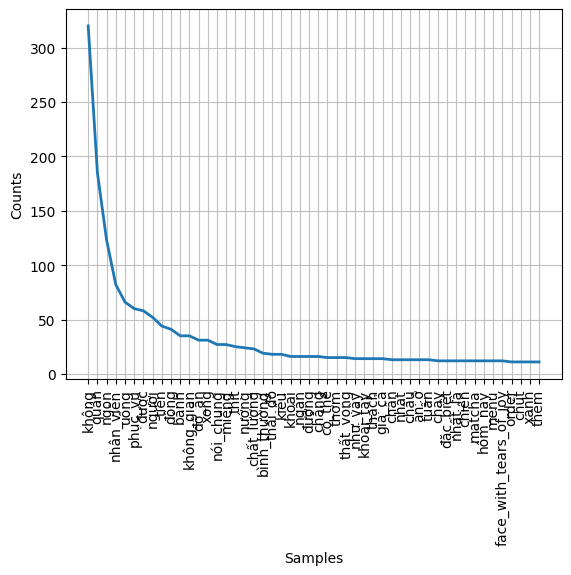

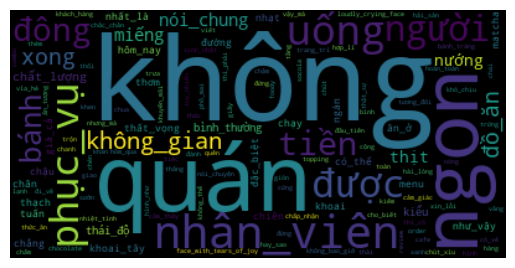

In [34]:
# Bài 2

from nltk.probability import FreqDist
from nltk.corpus import stopwords

with open("data.txt", "r", encoding="utf-8") as f:
    text = f.read()
text = text.replace("\n", " ")
text = text.split(" ")
while "" in text:
    text.remove("")
#################################
##### Exploring Text Data #######
#################################
#print("List of Datasets:",text_pre)
print("Number of words: ",len(text))

# Compute the frequency of all words
frequency_dist = FreqDist(word.lower() for word in text)

## show only th top 50 results
print(frequency_dist.most_common(50))


## Consider words with length greater than 3 and plot
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)


## Build a word cloud
# install library
# pip install wordcloud

from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
#plotting the wordcloud
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [45]:
# Bài 3a

with open("data.txt", "r", encoding="utf-8") as f:
    data = f.read()
data = data.split("\n")
while "" in data:
    data.remove("")

from sklearn.feature_extraction.text import CountVectorizer

# Xay dung vector BOW
vect = CountVectorizer()
X = vect.fit_transform(data)

# Xay dung tu dien
dictionary=list(vect.get_feature_names_out())

print("Words in dictionary: ", dictionary)
print("Vector Bag-of-Word: \n", X.toarray())

Words in dictionary:  ['acb', 'again', 'ai_ai', 'ai_ngờ', 'alo', 'an', 'an_toàn', 'angry_face', 'anh', 'anh_chị', 'anh_ta', 'anxious_face_with_sweat', 'baked', 'ban_công', 'ban_đầu', 'bao', 'bao_giờ', 'bao_lâu', 'bao_nhiêu', 'bbq', 'beaming_face_with_smiling_eyes', 'berry', 'bi', 'bill', 'bingsu', 'bit', 'biê', 'biến', 'biết', 'biết_chừng_nào', 'biết_nghĩ', 'biển', 'biệt_thự', 'bla', 'blacklist', 'blue', 'boa', 'bon', 'bon_chen', 'brownie', 'bt', 'buoi', 'but', 'buô', 'buốt', 'buồn', 'buổi_sáng', 'buổi_trưa', 'buộc', 'bv', 'bx', 'bài_tập', 'bàn', 'bàn_bạc', 'bàn_ghế', 'bàn_là', 'bàn_tay', 'bàn_tán', 'bày', 'bày_biện', 'bày_đặt', 'bá', 'bánh', 'bánh_bao', 'bánh_gối', 'bánh_mì', 'bánh_sandwich', 'bánh_tráng', 'báo', 'báo_giá', 'bát', 'bâ', 'bây', 'bây_giờ', 'bãi', 'bé', 'bé_bé', 'bé_tí', 'bé_tẹo', 'béo', 'béo_béo', 'bê', 'bên_bị', 'bên_cạnh', 'bì', 'bình', 'bình_dân', 'bình_thường', 'bí', 'bí_đỏ', 'bò', 'bó', 'bó_tay', 'bù', 'bùi_viện', 'bún', 'bơ', 'bơi', 'bư', 'bưng', 'bạc', 'bạn', 'bạ